In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('20220201_20220213_PRC_RTPD_LMP_RTPD_20220213_10_46_16_v3.csv')
data[data['NODE_ID']=='0096WD_7_N001']

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP


In [4]:
data

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP
0,2022-02-01T08:00:00-00:00,2022-02-01T08:15:00-00:00,2022-02-01,1,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,48.73762,1,1
1,2022-02-01T09:00:00-00:00,2022-02-01T09:15:00-00:00,2022-02-01,2,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,47.36191,1,1
2,2022-02-01T10:00:00-00:00,2022-02-01T10:15:00-00:00,2022-02-01,3,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,49.05951,1,1
3,2022-02-01T11:00:00-00:00,2022-02-01T11:15:00-00:00,2022-02-01,4,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,48.68276,1,1
4,2022-02-01T12:00:00-00:00,2022-02-01T12:15:00-00:00,2022-02-01,5,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,48.43528,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,2022-02-13T08:45:00-00:00,2022-02-13T09:00:00-00:00,2022-02-13,1,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,MCL,LMP_LOSS_PRC,0096WD_7_N002,ALL,1,0.65735,4,64
5776,2022-02-13T08:00:00-00:00,2022-02-13T08:15:00-00:00,2022-02-13,1,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,MGHG,LMP_GHG_PRC,0096WD_7_N002,ALL,1,0.00000,1,65
5777,2022-02-13T08:15:00-00:00,2022-02-13T08:30:00-00:00,2022-02-13,1,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,MGHG,LMP_GHG_PRC,0096WD_7_N002,ALL,1,0.00000,2,65
5778,2022-02-13T08:30:00-00:00,2022-02-13T08:45:00-00:00,2022-02-13,1,0096WD_7_N002,0096WD_7_N002,0096WD_7_N002,RTPD,MGHG,LMP_GHG_PRC,0096WD_7_N002,ALL,1,0.00000,3,65


In [5]:
data.NODE_ID.value_counts()

0096WD_7_N002    5780
Name: NODE_ID, dtype: int64

In [6]:
data1 = pd.read_csv('20220201_20220213_PRC_RTPD_LMP_RTPD_20220213_11_08_15_v3.csv')
data1.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP
0,2022-02-01T08:00:00-00:00,2022-02-01T08:15:00-00:00,2022-02-01,1,12STREET_LNODEEET1,12STREET_LNODEEET1,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,34.42116,1,1
1,2022-02-01T09:00:00-00:00,2022-02-01T09:15:00-00:00,2022-02-01,2,12STREET_LNODEEET1,12STREET_LNODEEET1,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,33.58737,1,1
2,2022-02-01T10:00:00-00:00,2022-02-01T10:15:00-00:00,2022-02-01,3,12STREET_LNODEEET1,12STREET_LNODEEET1,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,35.12500,1,1
3,2022-02-01T11:00:00-00:00,2022-02-01T11:15:00-00:00,2022-02-01,4,12STREET_LNODEEET1,12STREET_LNODEEET1,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,35.79503,1,1
4,2022-02-01T12:00:00-00:00,2022-02-01T12:15:00-00:00,2022-02-01,5,12STREET_LNODEEET1,12STREET_LNODEEET1,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,36.08649,1,1


In [7]:
data1.NODE_ID.value_counts()

12STREET_LNODEEET1    5780
Name: NODE_ID, dtype: int64

In [8]:
data2 = pd.read_csv('20220201_20220213_PRC_RTPD_LMP_RTPD_20220213_11_12_33_v3.csv')
data2.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP
0,2022-02-01T08:00:00-00:00,2022-02-01T08:15:00-00:00,2022-02-01,1,4C744C22_7_N001,4C744C22_7_N001,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,49.22739,1,1
1,2022-02-01T09:00:00-00:00,2022-02-01T09:15:00-00:00,2022-02-01,2,4C744C22_7_N001,4C744C22_7_N001,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,47.65131,1,1
2,2022-02-01T10:00:00-00:00,2022-02-01T10:15:00-00:00,2022-02-01,3,4C744C22_7_N001,4C744C22_7_N001,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,49.30309,1,1
3,2022-02-01T11:00:00-00:00,2022-02-01T11:15:00-00:00,2022-02-01,4,4C744C22_7_N001,4C744C22_7_N001,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,48.95788,1,1
4,2022-02-01T12:00:00-00:00,2022-02-01T12:15:00-00:00,2022-02-01,5,4C744C22_7_N001,4C744C22_7_N001,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,48.68074,1,1


In [9]:
data2.MARKET_RUN_ID.value_counts()

RTPD    5780
Name: MARKET_RUN_ID, dtype: int64

In [10]:
data2.LMP_TYPE.value_counts()

MCE     1156
MCL     1156
MGHG    1156
MCC     1156
LMP     1156
Name: LMP_TYPE, dtype: int64

In [88]:
data2.XML_DATA_ITEM.value_counts()

LMP_ENE_PRC     1156
LMP_LOSS_PRC    1156
LMP_PRC         1156
LMP_CONG_PRC    1156
LMP_GHG_PRC     1156
Name: XML_DATA_ITEM, dtype: int64

In [89]:
data2.GRP_TYPE.value_counts()

ALL    5780
Name: GRP_TYPE, dtype: int64

In [90]:
data2.OPR_INTERVAL.value_counts()

3    1445
2    1445
1    1445
4    1445
Name: OPR_INTERVAL, dtype: int64

In [91]:
data2.GROUP.value_counts()

4     96
20    96
59    96
12    96
57    96
      ..
63     4
64     4
61     4
62     4
65     4
Name: GROUP, Length: 65, dtype: int64

In [92]:
merged = pd.concat([data, data1, data2]).reset_index()

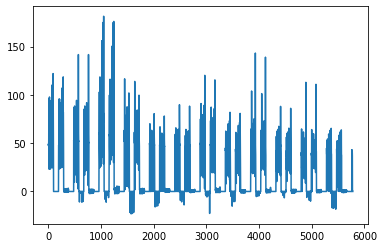

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data.PRC)

In [94]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [95]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 17 columns):
index                    17340 non-null int64
INTERVALSTARTTIME_GMT    17340 non-null object
INTERVALENDTIME_GMT      17340 non-null object
OPR_DT                   17340 non-null object
OPR_HR                   17340 non-null int64
NODE_ID_XML              17340 non-null object
NODE_ID                  17340 non-null object
NODE                     17340 non-null object
MARKET_RUN_ID            17340 non-null object
LMP_TYPE                 17340 non-null object
XML_DATA_ITEM            17340 non-null object
PNODE_RESMRID            17340 non-null object
GRP_TYPE                 17340 non-null object
POS                      17340 non-null int64
PRC                      17340 non-null float64
OPR_INTERVAL             17340 non-null int64
GROUP                    17340 non-null int64
dtypes: float64(1), int64(5), object(11)
memory usage: 2.2+ MB


In [96]:
merged['datetime'] = pd.to_datetime(merged.OPR_DT+' '+merged.INTERVALSTARTTIME_GMT.apply(lambda x: x[11:]))
merged = merged.drop(['OPR_HR', 'OPR_DT', 'INTERVALSTARTTIME_GMT', 'INTERVALENDTIME_GMT','NODE_ID_XML','index','NODE_ID'], axis=1)
merged = merged[merged['LMP_TYPE']=='LMP']

In [97]:
merged = merged.dropna()

In [98]:
merged.sort_values(['datetime','NODE'], inplace=True, ascending=True)
merged.head()

,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP,datetime
16,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,39.65951,1,1,2022-02-01 00:00:00+00:00
5796,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,37.24534,1,1,2022-02-01 00:00:00+00:00
11576,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,39.72225,1,1,2022-02-01 00:00:00+00:00
40,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,49.22015,2,1,2022-02-01 00:15:00+00:00
5820,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,39.85630,2,1,2022-02-01 00:15:00+00:00


In [99]:
merged.head(15)

,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP,datetime
16,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,39.65951,1,1,2022-02-01 00:00:00+00:00
5796,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,37.24534,1,1,2022-02-01 00:00:00+00:00
11576,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,39.72225,1,1,2022-02-01 00:00:00+00:00
40,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,49.22015,2,1,2022-02-01 00:15:00+00:00
5820,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,39.85630,2,1,2022-02-01 00:15:00+00:00
11600,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,49.37507,2,1,2022-02-01 00:15:00+00:00
64,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,74.04586,3,1,2022-02-01 00:30:00+00:00
5844,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,61.66506,3,1,2022-02-01 00:30:00+00:00
11624,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,74.37829,3,1,2022-02-01 00:30:00+00:00
88,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,97.93183,4,1,2022-02-01 00:45:00+00:00


In [100]:
print('Number of rows and columns after removing missing values:', merged.shape)
print('The time series starts from: ', merged['datetime'].min())
print('The time series ends on: ', merged['datetime'].max())

Number of rows and columns after removing missing values: (3468, 11)
The time series starts from:  2022-02-01 00:00:00+00:00
The time series ends on:  2022-02-13 08:45:00+00:00


In [101]:
# Split into training, validation and test datasets.
# Since it's timeseries we should do it by date.
from datetime import timedelta
test_cutoff_date = merged['datetime'].max() - timedelta(days=2)
val_cutoff_date = test_cutoff_date - timedelta(days=2)

merged_test = merged[merged['datetime'] > test_cutoff_date]
merged_val = merged[(merged['datetime'] > val_cutoff_date) & (merged['datetime'] <= test_cutoff_date)]
merged_train = merged[merged['datetime'] <= val_cutoff_date]

#check out the datasets
print('Test dates: {} to {}'.format(merged_test['datetime'].min(), merged_test['datetime'].max()))
print('Validation dates: {} to {}'.format(merged_val['datetime'].min(), merged_val['datetime'].max()))
print('Train dates: {} to {}'.format(merged_train['datetime'].min(), merged_train['datetime'].max()))

Test dates: 2022-02-11 09:00:00+00:00 to 2022-02-13 08:45:00+00:00
Validation dates: 2022-02-09 09:00:00+00:00 to 2022-02-11 08:45:00+00:00
Train dates: 2022-02-01 00:00:00+00:00 to 2022-02-09 08:45:00+00:00


In [102]:
#merged = pd.get_dummies(merged)
merged['Price'] = merged['PRC']
merged.drop(['PRC'],axis=1, inplace = True)
merged.head()

,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,OPR_INTERVAL,GROUP,datetime,Price
16,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,1,1,2022-02-01 00:00:00+00:00,39.65951
5796,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,1,1,2022-02-01 00:00:00+00:00,37.24534
11576,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,1,1,2022-02-01 00:00:00+00:00,39.72225
40,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,2,1,2022-02-01 00:15:00+00:00,49.22015
5820,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,2,1,2022-02-01 00:15:00+00:00,39.85630


In [103]:
merged.set_index('datetime',inplace = True)
merged.head()

,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,OPR_INTERVAL,GROUP,Price
datetime,,,,,,,,,,
2022-02-01 00:00:00+00:00,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,1,1,39.65951
2022-02-01 00:00:00+00:00,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,1,1,37.24534
2022-02-01 00:00:00+00:00,4C744C22_7_N001,RTPD,LMP,LMP_PRC,4C744C22_7_N001,ALL,1,1,1,39.72225
2022-02-01 00:15:00+00:00,0096WD_7_N002,RTPD,LMP,LMP_PRC,0096WD_7_N002,ALL,1,2,1,49.22015
2022-02-01 00:15:00+00:00,12STREET_LNODEEET1,RTPD,LMP,LMP_PRC,12STREET_LNODEEET1,ALL,1,2,1,39.85630


In [104]:
df_train = merged.iloc[0:2774]
df_test = merged.iloc[2774:]

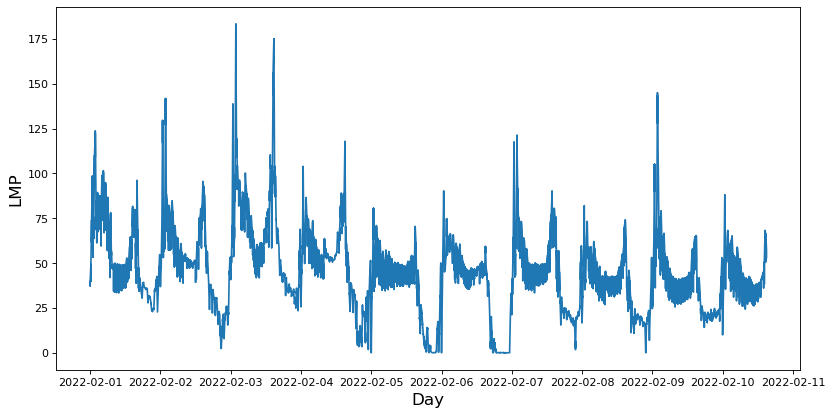

In [108]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
plt.plot(df_train.Price)
plt.xlabel('Day', size = 15)
plt.ylabel('LMP', size = 15)
plt.show()

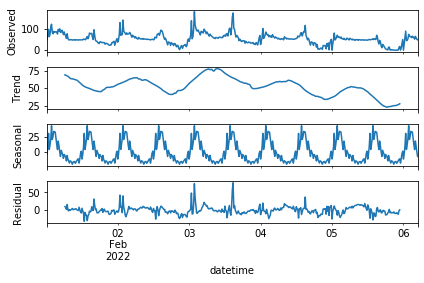

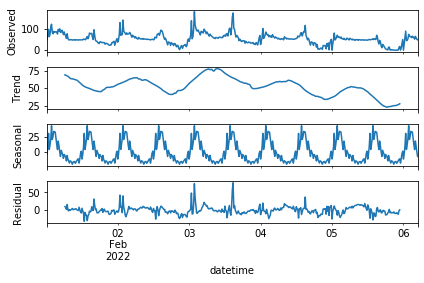

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = merged[merged.NODE == '0096WD_7_N002']['Price'].iloc[1:500]
result = seasonal_decompose(series, model='additive',freq=48)
result.plot()

## RNN Network to predict LMP for Node 0096WD_7_N002

Epoch 1/100
767/767 - 5s - loss: 0.0081 - 5s/epoch - 7ms/step
Epoch 2/100
767/767 - 1s - loss: 0.0050 - 1s/epoch - 2ms/step
Epoch 3/100
767/767 - 1s - loss: 0.0046 - 1s/epoch - 2ms/step
Epoch 4/100
767/767 - 1s - loss: 0.0045 - 1s/epoch - 2ms/step
Epoch 5/100
767/767 - 1s - loss: 0.0042 - 1s/epoch - 2ms/step
Epoch 6/100
767/767 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 7/100
767/767 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 8/100
767/767 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 9/100
767/767 - 1s - loss: 0.0041 - 1s/epoch - 2ms/step
Epoch 10/100
767/767 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 11/100
767/767 - 2s - loss: 0.0039 - 2s/epoch - 2ms/step
Epoch 12/100
767/767 - 2s - loss: 0.0038 - 2s/epoch - 2ms/step
Epoch 13/100
767/767 - 2s - loss: 0.0039 - 2s/epoch - 2ms/step
Epoch 14/100
767/767 - 2s - loss: 0.0039 - 2s/epoch - 2ms/step
Epoch 15/100
767/767 - 1s - loss: 0.0039 - 1s/epoch - 2ms/step
Epoch 16/100
767/767 - 1s - loss: 0.0037 - 1s/epoch - 2ms/step
E

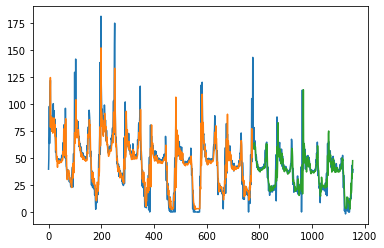

In [123]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=6):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

dataframe = merged[merged.NODE == '0096WD_7_N002']['Price']
dataset = dataframe.values.reshape(-1, 1)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(240, input_shape=(1, look_back),return_sequences=True))
model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### RMSE metric to compare the quality of results

In [124]:
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9.52 RMSE
Test Score: 7.84 RMSE


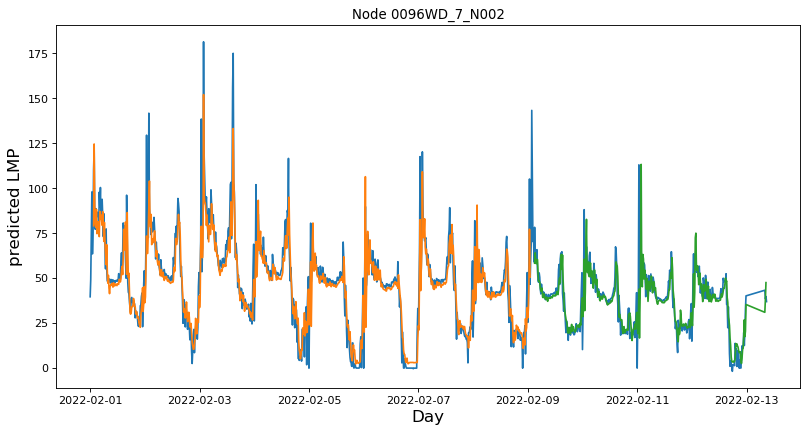

In [134]:
# plot baseline and predictions
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
plt.plot(series.index,scaler.inverse_transform(dataset))
plt.plot(series.index,trainPredictPlot)
plt.plot(series.index,testPredictPlot)
plt.xlabel('Day', size = 15)
plt.ylabel('predicted LMP', size = 15)
plt.title('Node 0096WD_7_N002')
plt.show()

## Arima for Node 0096WD_7_N002

In [117]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
series = merged[merged.NODE == '0096WD_7_N002']['Price']
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

Test RMSE: 9.266


No handles with labels found to put in legend.


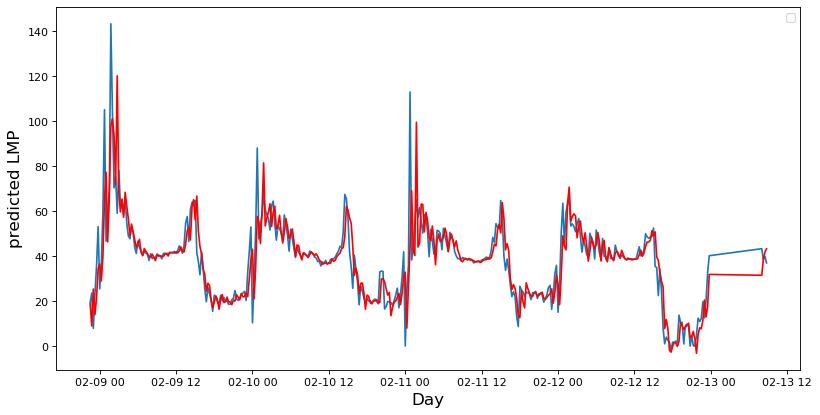

In [118]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
pyplot.plot(series.index[size:len(X)],test)
pyplot.plot(series.index[size:len(X)],predictions, color='red')
plt.xlabel('Day', size = 15)
plt.ylabel('predicted LMP', size = 15)
plt.title('Node 0096WD_7_N002')
plt.legend()
pyplot.show()

In [115]:
merged['NODE'].value_counts()

0096WD_7_N002         1156
4C744C22_7_N001       1156
12STREET_LNODEEET1    1156
Name: NODE, dtype: int64

## Arima for Node 4C744C22_7_N001

In [119]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
series = merged[merged.NODE == '4C744C22_7_N001']['Price']
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 9.324


No handles with labels found to put in legend.


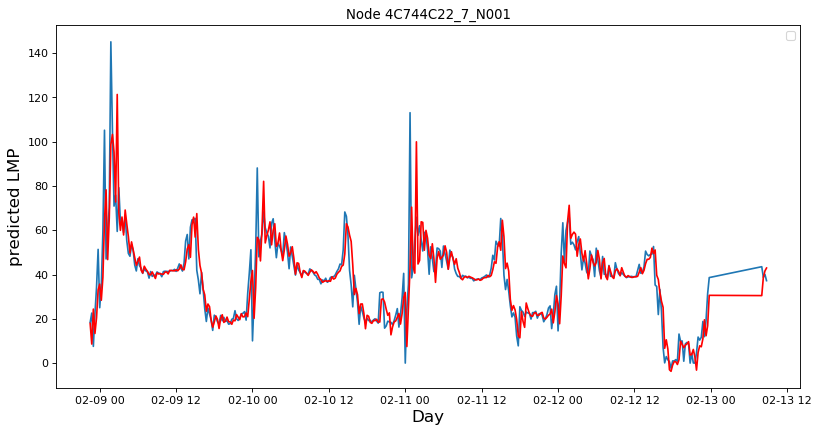

In [120]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
pyplot.plot(series.index[size:len(X)],test)
pyplot.plot(series.index[size:len(X)],predictions, color='red')
plt.xlabel('Day', size = 15)
plt.ylabel('predicted LMP', size = 15)
plt.title('Node 4C744C22_7_N001')
plt.legend()
pyplot.show()

## Arima for Node 12STREET_LNODEEET1

In [121]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
series = merged[merged.NODE == '12STREET_LNODEEET1']['Price']
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

Test RMSE: 8.509


No handles with labels found to put in legend.


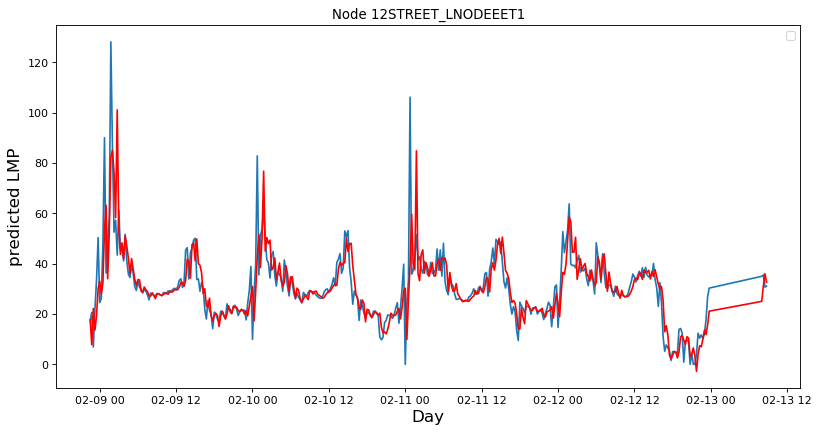

In [122]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
pyplot.plot(series.index[size:len(X)],test)
pyplot.plot(series.index[size:len(X)],predictions, color='red')
plt.xlabel('Day', size = 15)
plt.ylabel('predicted LMP', size = 15)
plt.title('Node 12STREET_LNODEEET1')
plt.legend()
pyplot.show()